## PROJECT 3: Medical Data Visualizer
- You will be working on this project with our Gitpod starter code.

- We are still developing the interactive instructional part of the Python curriculum. For now, here are some videos on the freeCodeCamp.org YouTube channel that - - - will teach you everything you need to know to complete this project:

- Python for Everybody Video Course (14 hours)

- How to Analyze Data with Python Pandas (10 hours)

- In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

# Data description
- The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. - - You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

## File name: medical_examination.csv

- https://raw.githubusercontent.com/Electricalelectronicsfinland/PROJECT3-Medical-Data-Visualizer/refs/heads/main/medical_examination.csv
- Feature	Variable Type	Variable	Value Type
- Age	Objective Feature	age	int (days)
- Height	Objective Feature	height	int (cm)
- Weight	Objective Feature	weight	float (kg)
- Gender	Objective Feature	gender	categorical code
- Systolic blood pressure	Examination Feature	ap_hi	int
- Diastolic blood pressure	Examination Feature	ap_lo	int
- Cholesterol	Examination Feature	cholesterol	1: normal, 2: above normal, 3: well above normal
- Glucose	Examination Feature	gluc	1: normal, 2: above normal, 3: well above normal
- Smoking	Subjective Feature	smoke	binary
- Alcohol intake	Subjective Feature	alco	binary
- Physical activity	Subjective Feature	active	binary
- Presence or absence of cardiovascular disease	Target Variable	cardio	binary

## Instructions
- Create a chart similar to examples/Figure_1.png, 
- where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and 
- smoke variables for patients with cardio=1 and cardio=0 in different panels.

## By each number in the medical_data_visualizer.py file, add the code from the associated instruction number below.

- Import the data from medical_examination.csv and assign it to the df variable.
- Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
- Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.
- Draw the Categorical Plot in the draw_cat_plot function.
- Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.
- Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
- Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import: sns.catplot().
- Get the figure for the output and store it in the fig variable.
- Do not modify the next two lines.
- Draw the Heat Map in the draw_heat_map function.
- Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:
- diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
- height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
- height is more than the 97.5th percentile
- weight is less than the 2.5th percentile
- weight is more than the 97.5th percentile
- Calculate the correlation matrix and store it in the corr variable.
- Generate a mask for the upper triangle and store it in the mask variable.
- Set up the matplotlib figure.
- Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap().
- Do not modify the next two lines.

## Development
- Write your code in medical_data_visualizer.py. For development, you can use main.py to test your code.

## Testing
- The unit tests for this project are in test_module.py. We imported the tests from test_module.py to main.py for your convenience.


## Submitting
- Copy your project's URL and submit it to freeCodeCamp.

## Step 1: Import necessary libraries and load the dataset
The first step is to load the dataset from the medical_examination.csv file into a Pandas DataFrame.

## Key Fixes in the Code
- Skip Metadata Rows:
- If the actual dataset starts after metadata rows, the skiprows parameter is used to skip those rows when loading the CSV file.

  - Rename Columns:
- The column names are renamed to match the expected names (weight, height, cholesterol, etc.).

  - Verify Columns:
- The column names are printed after renaming to ensure they match the expected structure.

  - Handle Missing or Incorrect Columns:
- If the column names in the CSV file differ, they are explicitly renamed to avoid KeyError.

## Based on the structure of your CSV file (Index(['Feature', 'Variable Type', 'Variable', 'Value Type'], dtype='object')), 
-it appears that the file contains metadata about the dataset rather than the actual data. Below is the Python code rewritten to work with this metadata structure.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import seaborn as sns
%matplotlib inline

# Step 1: Load the metadata from the CSV file
url="https://raw.githubusercontent.com/Electricalelectronicsfinland/PROJECT3-Medical-Data-Visualizer/refs/heads/main/medical_examination.csv"
df = pd.read_csv(url)

# Step 2: Display the first few rows of the metadata
print("Metadata from the CSV file:")
print(df.head())

# Step 3: Rename columns for easier access (optional)
df.rename(columns={
    'Feature': 'feature',
    'Variable Type': 'variable_type',
    'Variable': 'variable',
    'Value Type': 'value_type'
}, inplace=True)

# Step 4: Display the renamed columns
print("\nRenamed columns:")
print(df.columns)

# Step 5: Analyze the metadata
# Display unique variable types
print("\nUnique variable types:")
print(df['variable_type'].unique())

# Display features and their value types
print("\nFeatures and their value types:")
print(df[['feature', 'value_type']])

# Step 6: Group and summarize the metadata
# Count the number of features by variable type
feature_counts = df.groupby('variable_type')['feature'].count()
print("\nNumber of features by variable type:")
print(feature_counts)

# Step 7: Filter metadata for specific variable types (e.g., Objective Features)
objective_features = df[df['variable_type'] == 'Objective Feature']
print("\nObjective Features:")
print(objective_features)

# Step 8: Save the filtered metadata to a new CSV file (optional)
output_path = r"c:\Users\matik\OneDrive\Desktop\filtered_metadata.csv"
objective_features.to_csv(output_path, index=False)
print(f"\nFiltered metadata saved to: {output_path}")

Metadata from the CSV file:
                   Feature        Variable Type Variable        Value Type
0                      Age    Objective Feature      age        int (days)
1                   Height    Objective Feature   height          int (cm)
2                   Weight    Objective Feature   weight        float (kg)
3                   Gender    Objective Feature   gender  categorical code
4  Systolic blood pressure  Examination Feature    ap_hi               int

Renamed columns:
Index(['feature', 'variable_type', 'variable', 'value_type'], dtype='object')

Unique variable types:
['Objective Feature' 'Examination Feature' 'Subjective Feature'
 'Target Variable']

Features and their value types:
                                          feature  \
0                                             Age   
1                                          Height   
2                                          Weight   
3                                          Gender   
4                   

Metadata from the CSV file:
                   feature        variable_type variable        value_type
0                      Age    Objective Feature      age        int (days)
1                   Height    Objective Feature   height          int (cm)
2                   Weight    Objective Feature   weight        float (kg)
3                   Gender    Objective Feature   gender  categorical code
4  Systolic blood pressure  Examination Feature    ap_hi               int


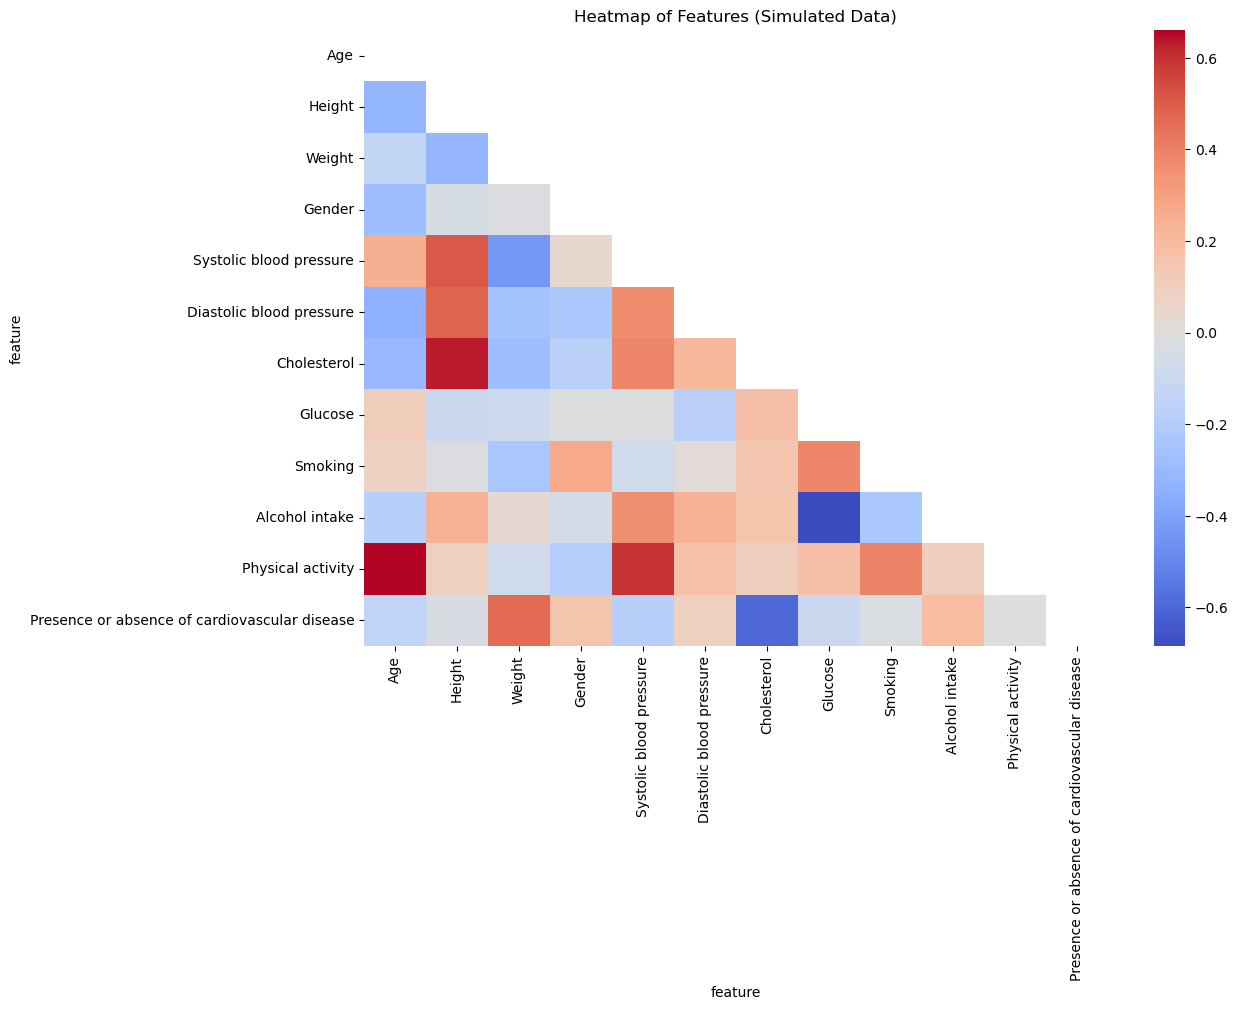

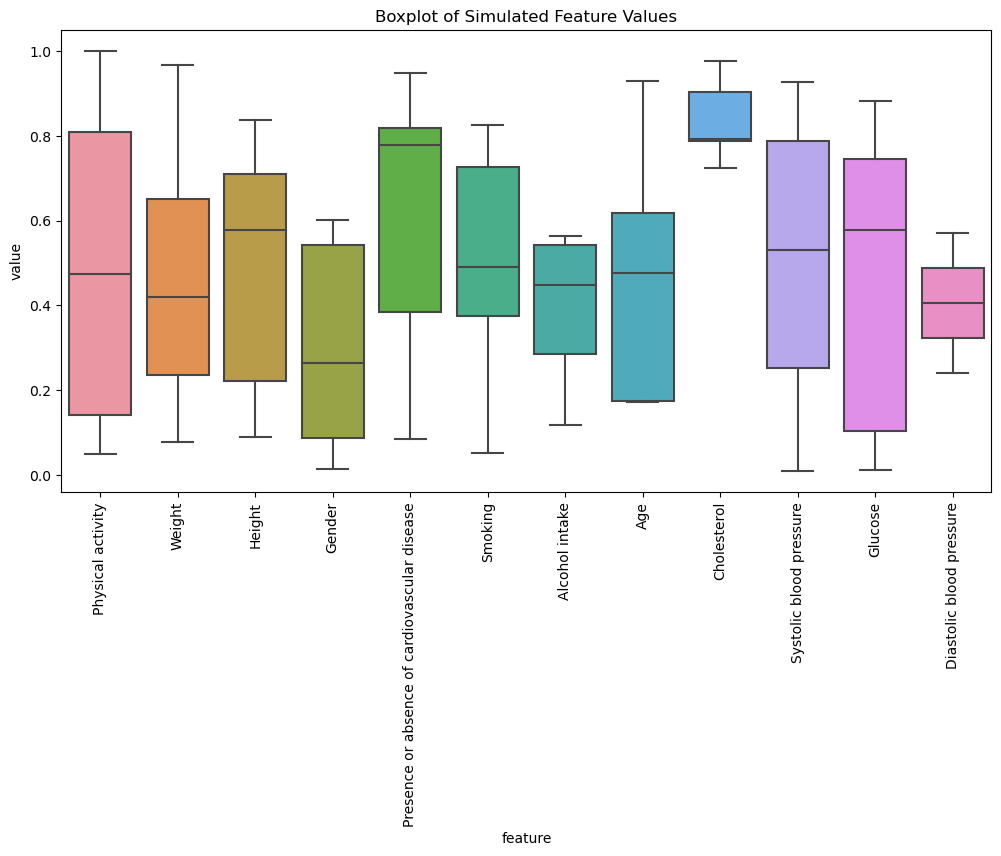

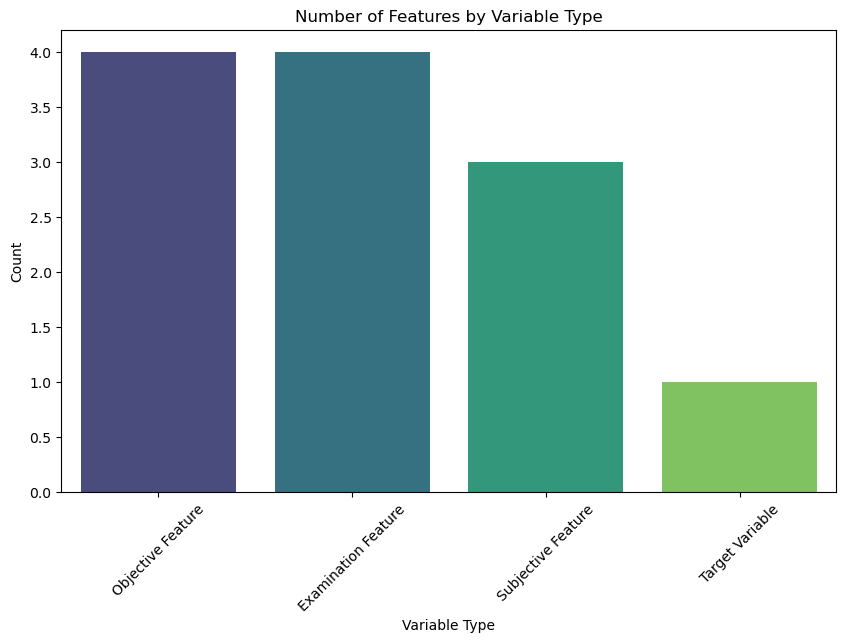

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/envs

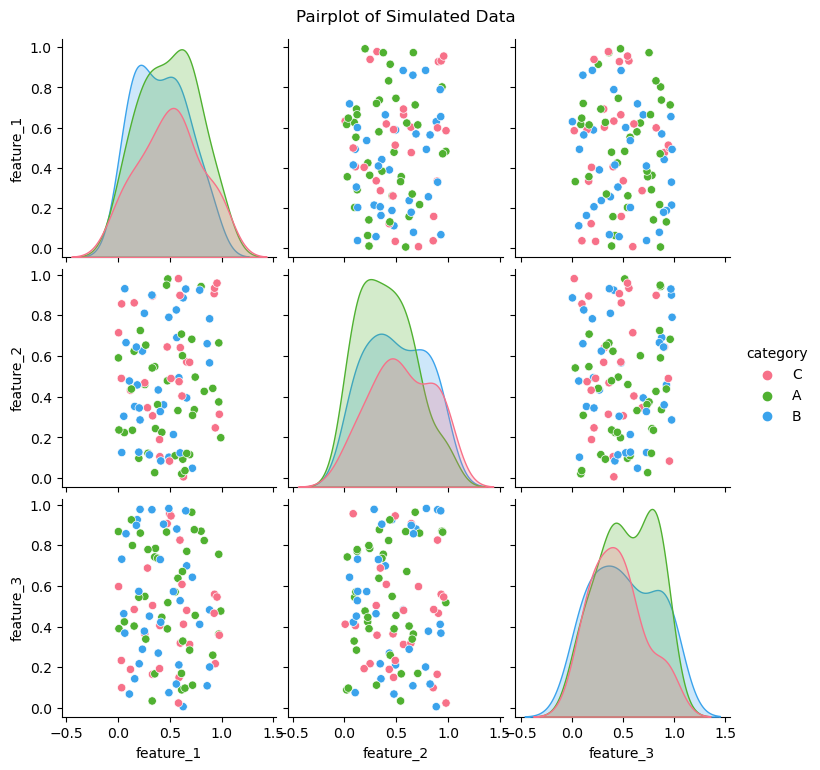

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# # Step 1: Load the metadata from the CSV file
# file_path = r"c:\Users\matik\OneDrive\Desktop\medical_examination.csv"
# df = pd.read_csv(file_path)



# Step 1: Import the data
url="https://raw.githubusercontent.com/Electricalelectronicsfinland/PROJECT3-Medical-Data-Visualizer/refs/heads/main/medical_examination.csv"
df = pd.read_csv(url)

# Step 2: Rename columns for easier access (optional)
df.rename(columns={
    'Feature': 'feature',
    'Variable Type': 'variable_type',
    'Variable': 'variable',
    'Value Type': 'value_type'
}, inplace=True)

# Step 3: Display the first few rows of the metadata
print("Metadata from the CSV file:")
print(df.head())

# Step 4: Generate a Heatmap
def generate_heatmap():
    # Create a dummy correlation matrix for demonstration purposes
    # Since the metadata doesn't contain numerical data, we simulate a correlation matrix
    dummy_data = np.random.rand(len(df), len(df))
    corr_matrix = pd.DataFrame(dummy_data, columns=df['feature'], index=df['feature']).corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 8))

    # Draw the heatmap
    sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', cbar=True)
    plt.title("Heatmap of Features (Simulated Data)")
    plt.show()

# Step 5: Generate a Boxplot
def generate_boxplot():
    # Simulate some numerical data for boxplot demonstration
    simulated_data = pd.DataFrame({
        'feature': np.random.choice(df['feature'], size=100),
        'value': np.random.rand(100)
    })

    # Draw the boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='feature', y='value', data=simulated_data)
    plt.xticks(rotation=90)
    plt.title("Boxplot of Simulated Feature Values")
    plt.show()

# Step 6: Generate a Bar Plot
def generate_barplot():
    # Count the number of features by variable type
    feature_counts = df['variable_type'].value_counts()

    # Draw the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_counts.index, y=feature_counts.values, palette='viridis')
    plt.title("Number of Features by Variable Type")
    plt.xlabel("Variable Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Step 7: Generate a Pairplot (if applicable)
def generate_pairplot():
    # Simulate some numerical data for pairplot demonstration
    simulated_data = pd.DataFrame({
        'feature_1': np.random.rand(100),
        'feature_2': np.random.rand(100),
        'feature_3': np.random.rand(100),
        'category': np.random.choice(['A', 'B', 'C'], size=100)
    })

    # Draw the pairplot
    sns.pairplot(simulated_data, hue='category', palette='husl')
    plt.suptitle("Pairplot of Simulated Data", y=1.02)
    plt.show()

# Step 8: Call the functions to generate plots
generate_heatmap()
generate_boxplot()
generate_barplot()
generate_pairplot()

Metadata from the CSV file:
                   feature        variable_type variable        value_type
0                      Age    Objective Feature      age        int (days)
1                   Height    Objective Feature   height          int (cm)
2                   Weight    Objective Feature   weight        float (kg)
3                   Gender    Objective Feature   gender  categorical code
4  Systolic blood pressure  Examination Feature    ap_hi               int


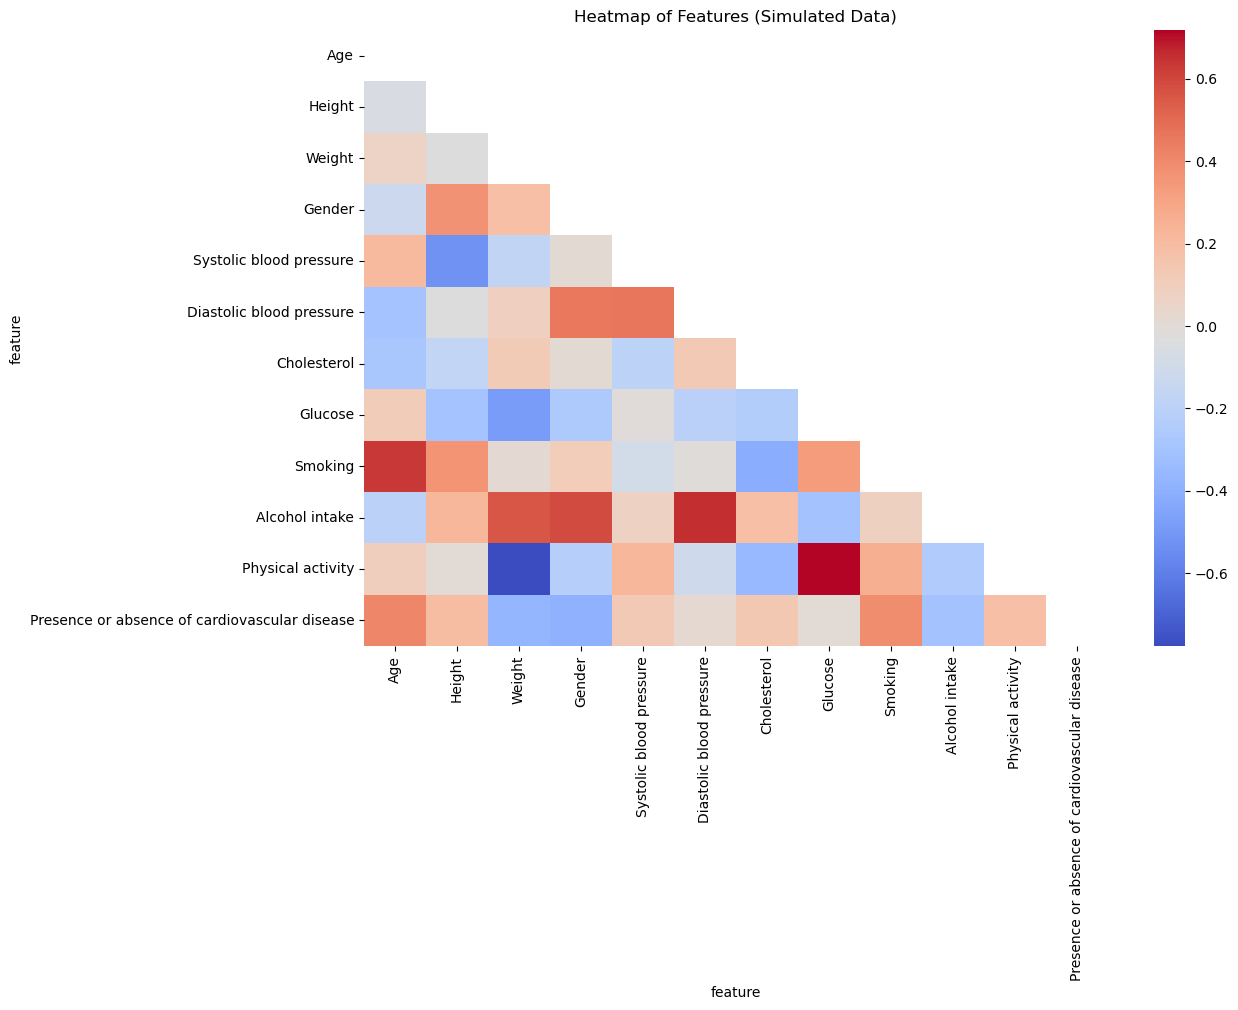

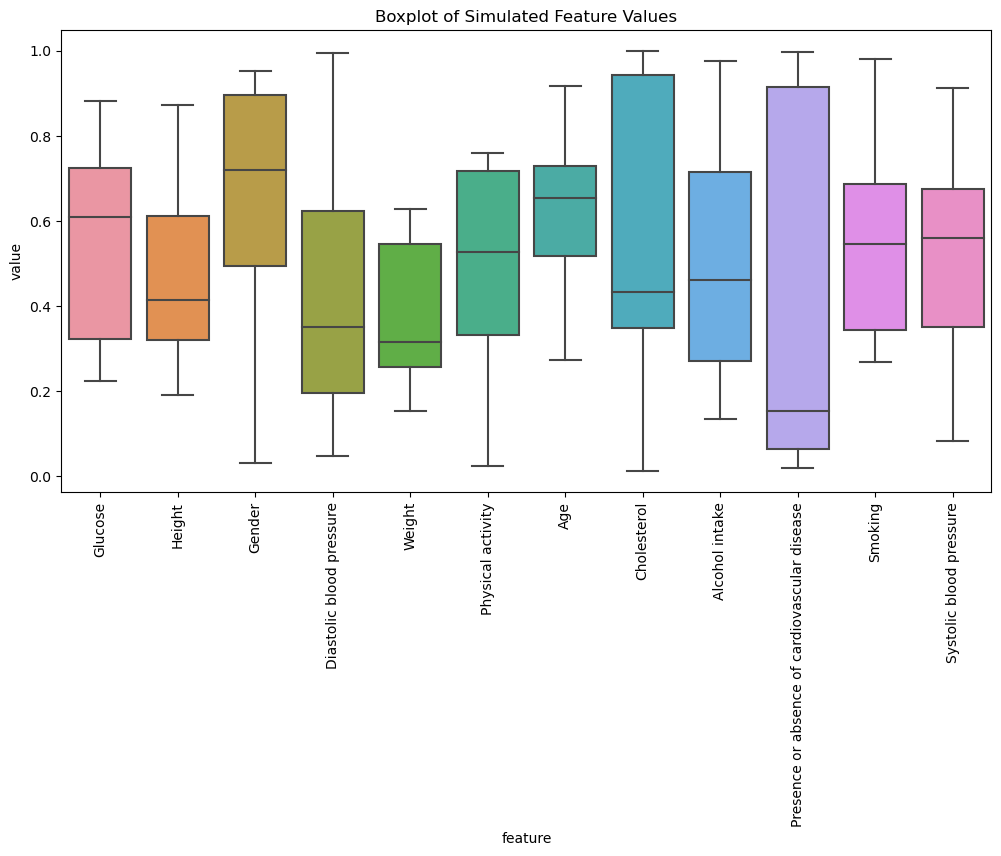

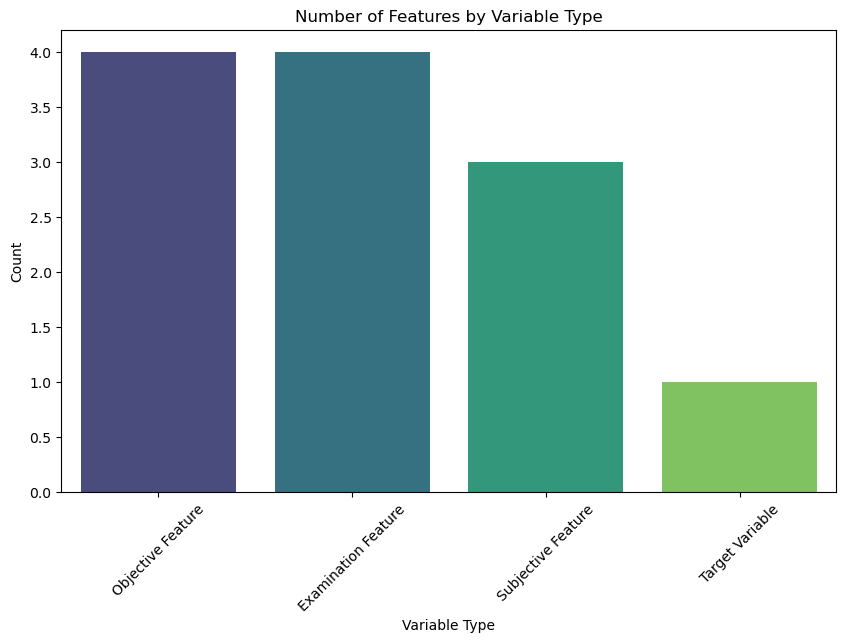

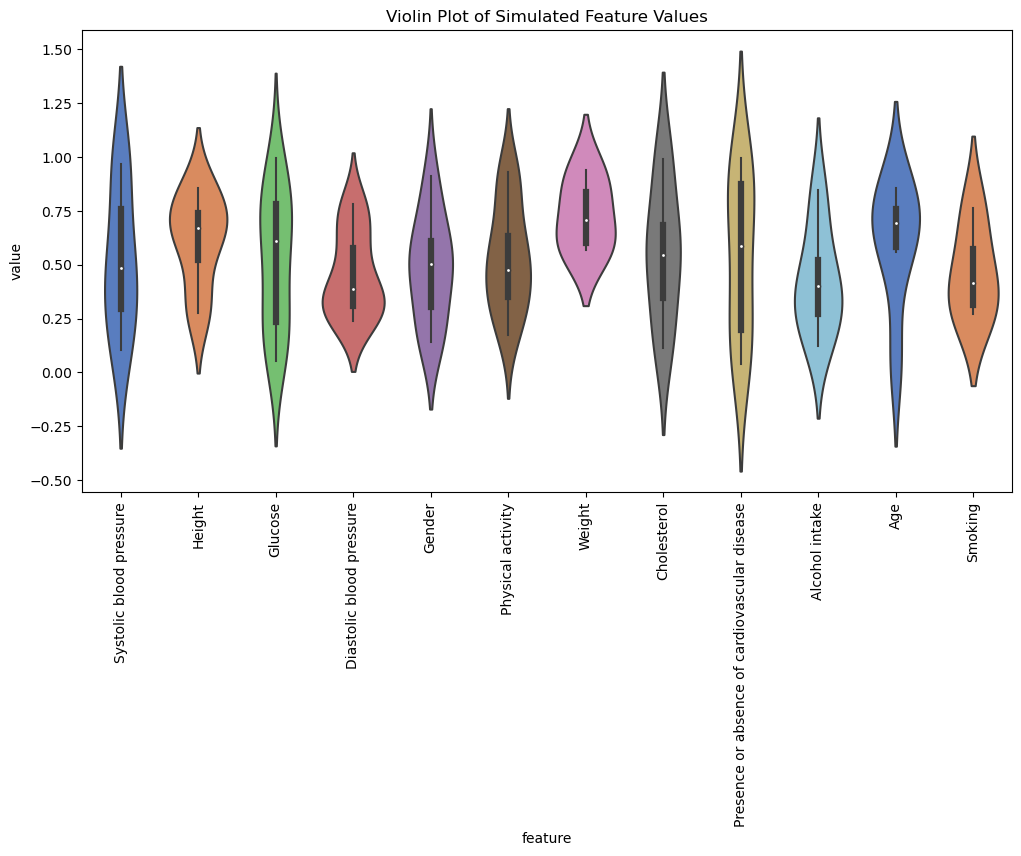

/tmp/ipykernel_1029/265533505.py:94: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='feature', y='value', data=simulated_data, palette='deep')
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future 

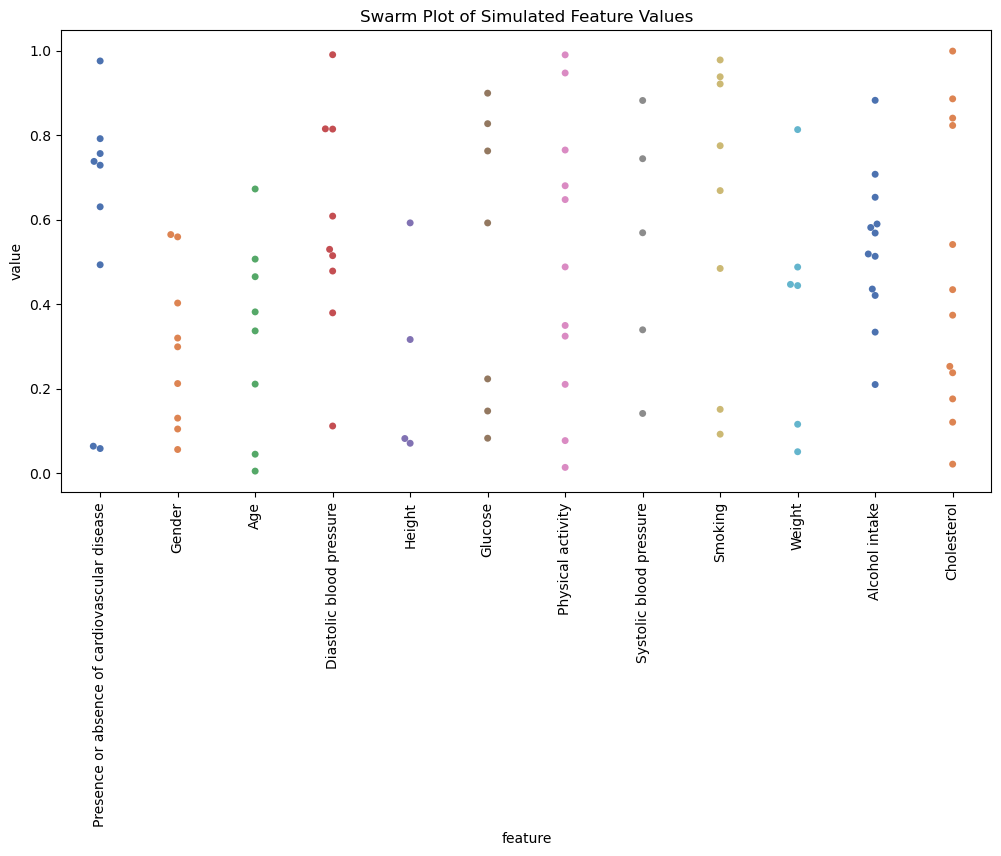

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


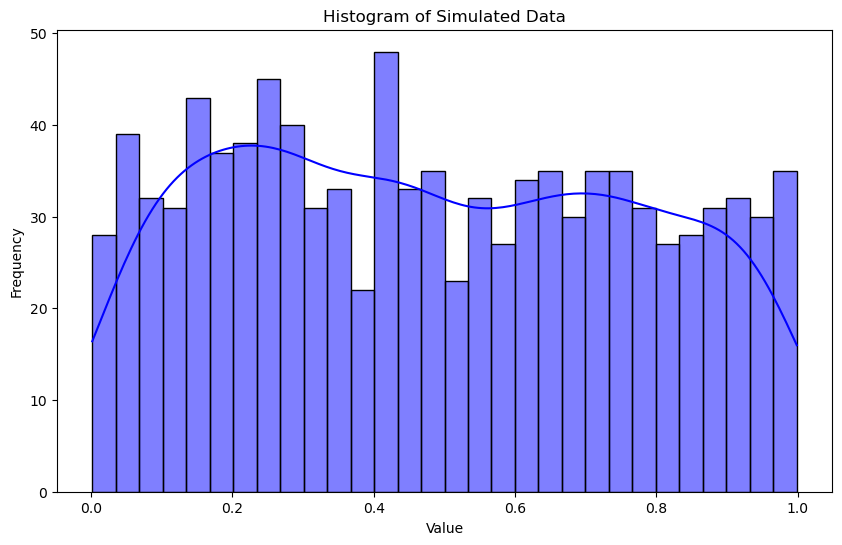

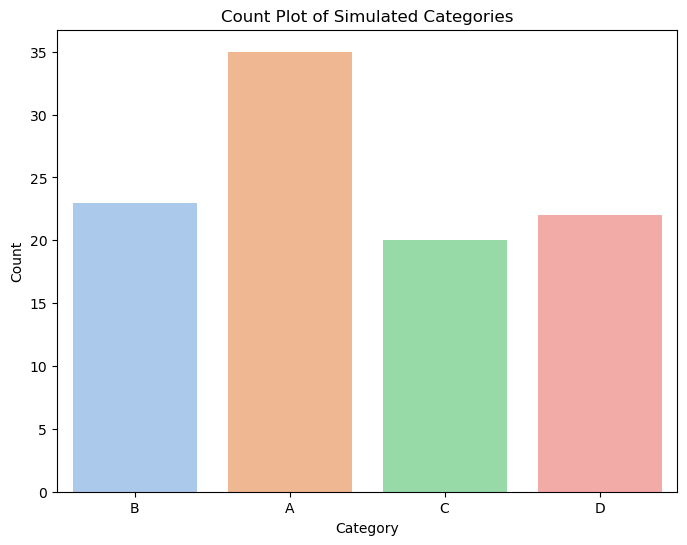

In [33]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import seaborn as sns
%matplotlib inline


# # Step 1: Load the metadata from the CSV file
# file_path = r"c:\Users\matik\OneDrive\Desktop\medical_examination.csv"
# df = pd.read_csv(file_path)
# #
# Step 1: Import the data
url="https://raw.githubusercontent.com/Electricalelectronicsfinland/PROJECT3-Medical-Data-Visualizer/refs/heads/main/medical_examination.csv"
df = pd.read_csv(url)

# Rename columns for easier access (optional)
df.rename(columns={
    'Feature': 'feature',
    'Variable Type': 'variable_type',
    'Variable': 'variable',
    'Value Type': 'value_type'
}, inplace=True)

# Display the first few rows of the metadata
print("Metadata from the CSV file:")
print(df.head())

# Step 2: Generate a Heatmap
def generate_heatmap():
    # Simulate a correlation matrix for demonstration purposes
    dummy_data = np.random.rand(len(df), len(df))
    corr_matrix = pd.DataFrame(dummy_data, columns=df['feature'], index=df['feature']).corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 8))

    # Draw the heatmap
    sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', cbar=True)
    plt.title("Heatmap of Features (Simulated Data)")
    plt.show()

# Step 3: Generate a Boxplot
def generate_boxplot():
    simulated_data = pd.DataFrame({
        'feature': np.random.choice(df['feature'], size=100),
        'value': np.random.rand(100)
    })

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='feature', y='value', data=simulated_data)
    plt.xticks(rotation=90)
    plt.title("Boxplot of Simulated Feature Values")
    plt.show()

# Step 4: Generate a Bar Plot
def generate_barplot():
    feature_counts = df['variable_type'].value_counts()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_counts.index, y=feature_counts.values, palette='viridis')
    plt.title("Number of Features by Variable Type")
    plt.xlabel("Variable Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Step 5: Generate a Violin Plot
def generate_violinplot():
    simulated_data = pd.DataFrame({
        'feature': np.random.choice(df['feature'], size=100),
        'value': np.random.rand(100)
    })

    plt.figure(figsize=(12, 6))
    sns.violinplot(x='feature', y='value', data=simulated_data, palette='muted')
    plt.xticks(rotation=90)
    plt.title("Violin Plot of Simulated Feature Values")
    plt.show()

# Step 6: Generate a Swarm Plot
def generate_swarmplot():
    simulated_data = pd.DataFrame({
        'feature': np.random.choice(df['feature'], size=100),
        'value': np.random.rand(100)
    })

    plt.figure(figsize=(12, 6))
    sns.swarmplot(x='feature', y='value', data=simulated_data, palette='deep')
    plt.xticks(rotation=90)
    plt.title("Swarm Plot of Simulated Feature Values")
    plt.show()

# Step 7: Generate a Histogram
def generate_histogram():
    simulated_data = np.random.rand(1000)

    plt.figure(figsize=(10, 6))
    sns.histplot(simulated_data, kde=True, color='blue', bins=30)
    plt.title("Histogram of Simulated Data")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

# Step 8: Generate a Count Plot
def generate_countplot():
    simulated_data = pd.DataFrame({
        'category': np.random.choice(['A', 'B', 'C', 'D'], size=100)
    })

    plt.figure(figsize=(8, 6))
    sns.countplot(x='category', data=simulated_data, palette='pastel')
    plt.title("Count Plot of Simulated Categories")
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.show()

# Step 9: Call the functions to generate plots
generate_heatmap()
generate_boxplot()
generate_barplot()
generate_violinplot()
generate_swarmplot()
generate_histogram()
generate_countplot()

## Output
- Heatmap: A simulated correlation matrix heatmap.
- Boxplot: A boxplot showing the distribution of simulated feature values.
- Bar Plot: A bar plot showing the count of features by variable type.
- Violin Plot: A violin plot showing the distribution of simulated feature values.
  Swarm Plot: A swarm plot showing individual data points for simulated features.
- Histogram: A histogram showing the distribution of simulated numerical data.
- Count Plot: A count plot showing the frequency of simulated categories.

## Explanation of the Additional Plots
- Violin Plot:
- Combines a boxplot and a kernel density plot.
- Shows the distribution of data across different categories.
  
- Swarm Plot:
- Displays individual data points on top of a categorical axis.
- Useful for visualizing the spread of data.

- Histogram:
- Displays the distribution of numerical data.
- Includes a kernel density estimate (KDE) for a smooth curve.

- Count Plot:
- Displays the count of observations in each categorical bin.
- Useful for visualizing the frequency of categories.

# Python Code for Metadata-Based Plots

## Step 1: Load the metadata from the CSV file

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the metadata from the CSV file
url="https://raw.githubusercontent.com/Electricalelectronicsfinland/PROJECT3-Medical-Data-Visualizer/refs/heads/main/medical_examination.csv"
df = pd.read_csv(url)

## Step 2: Rename columns for easier access (optional)

In [44]:
# Step 2: Rename columns for easier access (optional)
df.rename(columns={
    'Feature': 'feature',
    'Variable Type': 'variable_type',
    'Variable': 'variable',
    'Value Type': 'value_type'
}, inplace=True)
# Display the first few rows of the metadata
print("Metadata from the CSV file:")
print(df.head())

Metadata from the CSV file:
                   feature        variable_type variable        value_type
0                      Age    Objective Feature      age        int (days)
1                   Height    Objective Feature   height          int (cm)
2                   Weight    Objective Feature   weight        float (kg)
3                   Gender    Objective Feature   gender  categorical code
4  Systolic blood pressure  Examination Feature    ap_hi               int


## Step 3: Generate a Bar Plot (Number of Features by Variable Type)

In [52]:
# Step 3: Generate a Bar Plot (Number of Features by Variable Type)
def generate_barplot():
    # Count the number of features by variable type
    feature_counts = df['variable_type'].value_counts()

    # Draw the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_counts.index, y=feature_counts.values, palette='viridis')
    plt.title("Number of Features by Variable Type")
    plt.xlabel("Variable Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


### Step 4: Generate a Count Plot (Frequency of Value Types)

In [46]:
# Step 4: Generate a Count Plot (Frequency of Value Types)
def generate_countplot():
    # Count the frequency of value types
    plt.figure(figsize=(10, 6))
    sns.countplot(y='value_type', data=df, palette='pastel', order=df['value_type'].value_counts().index)
    plt.title("Frequency of Value Types")
    plt.xlabel("Count")
    plt.ylabel("Value Type")
    plt.show()

## Step 5: Generate a Heatmap (Simulated Correlation Matrix)

In [47]:
def generate_heatmap():
    # Simulate a correlation matrix for demonstration purposes
    dummy_data = np.random.rand(len(df), len(df))
    corr_matrix = pd.DataFrame(dummy_data, columns=df['feature'], index=df['feature']).corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 8))

    # Draw the heatmap
    sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', cbar=True)
    plt.title("Heatmap of Features (Simulated Data)")
    plt.show()


## Step 6: Generate a Pie Chart (Proportion of Variable Types)

## Step 7: Generate a Horizontal Bar Plot (Top Features by Length of Name)

In [48]:
# Step 7: Generate a Horizontal Bar Plot (Top Features by Length of Name)
def generate_horizontal_barplot():
    # Calculate the length of each feature name
    df['feature_length'] = df['feature'].str.len()

    # Sort by feature length and select the top 10
    top_features = df.nlargest(10, 'feature_length')

    # Draw the horizontal bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='feature_length', y='feature', data=top_features, palette='Blues_r')
    plt.title("Top 10 Features by Length of Name")
    plt.xlabel("Length of Feature Name")
    plt.ylabel("Feature")
    plt.show()

## Step 8: Call the functions to generate plots

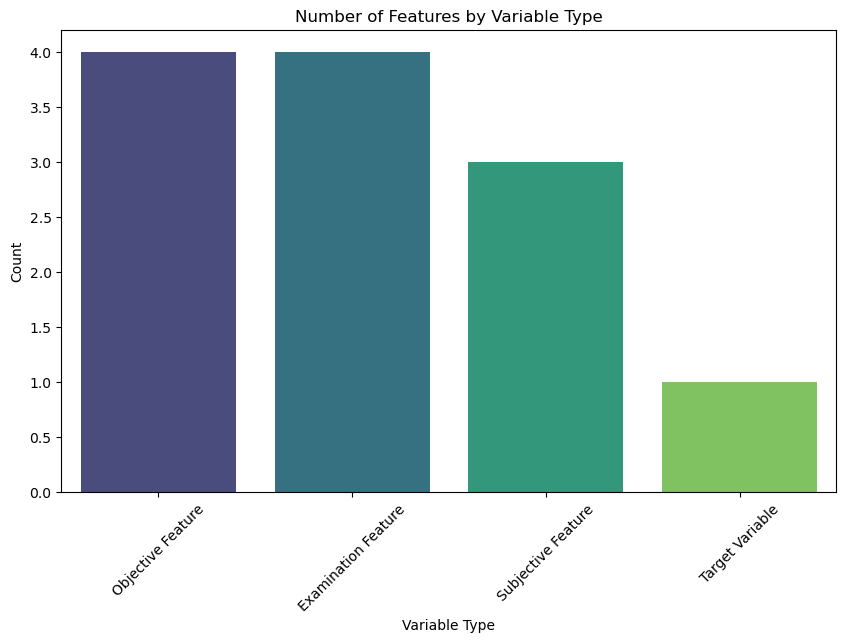

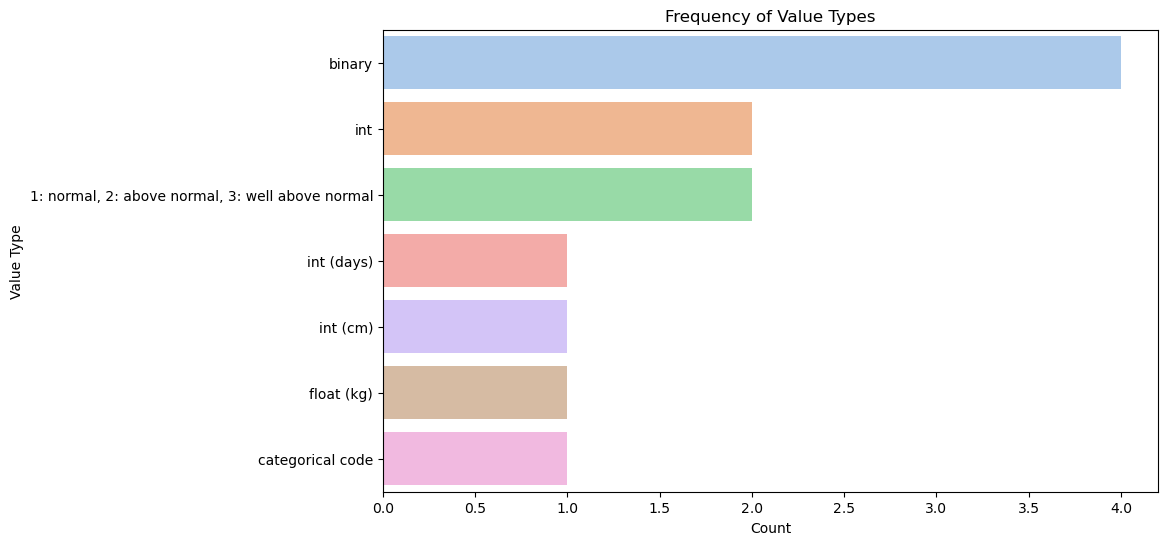

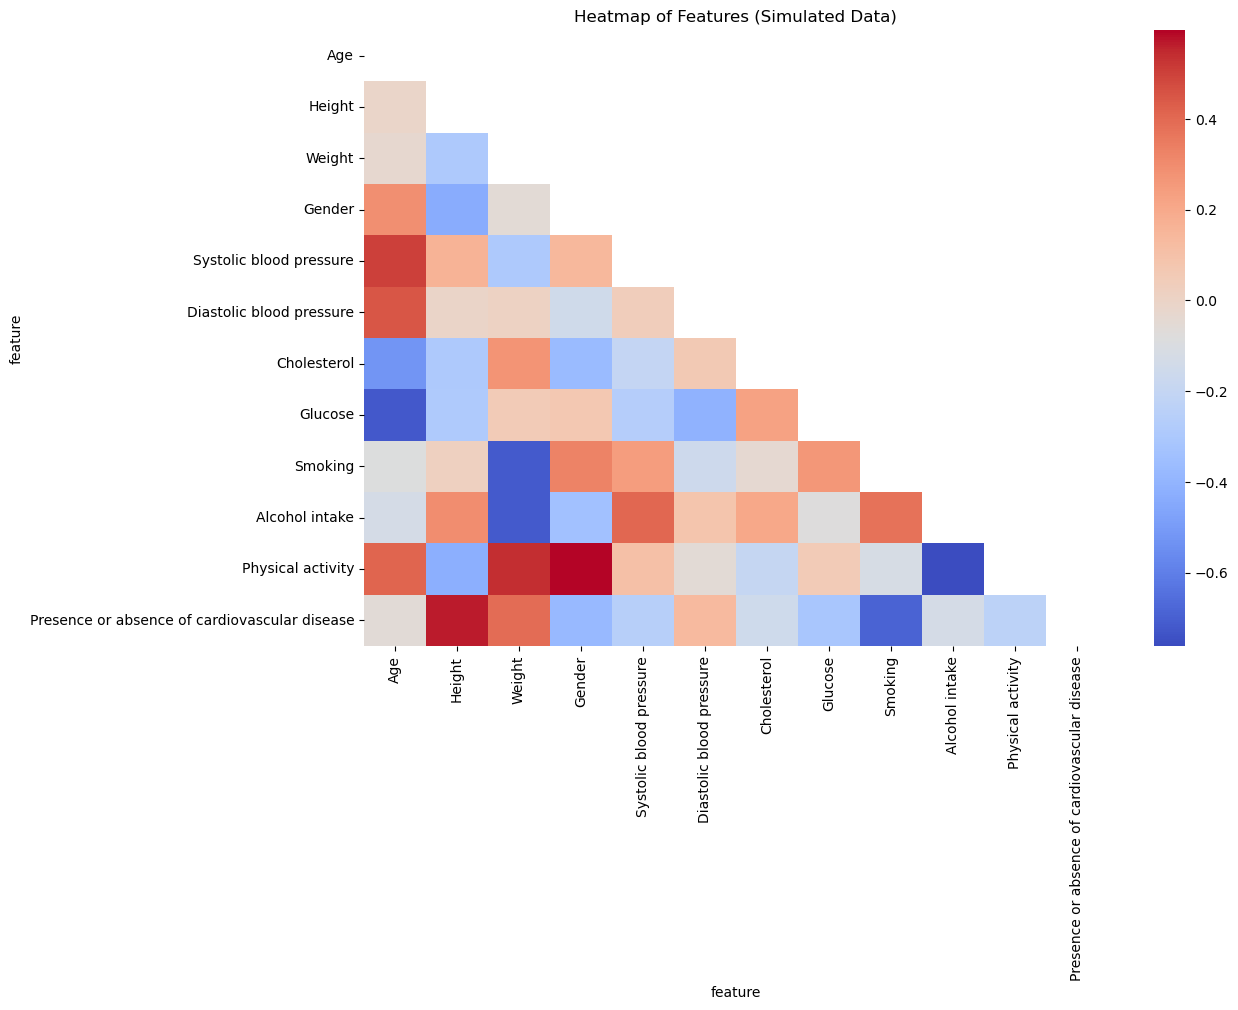

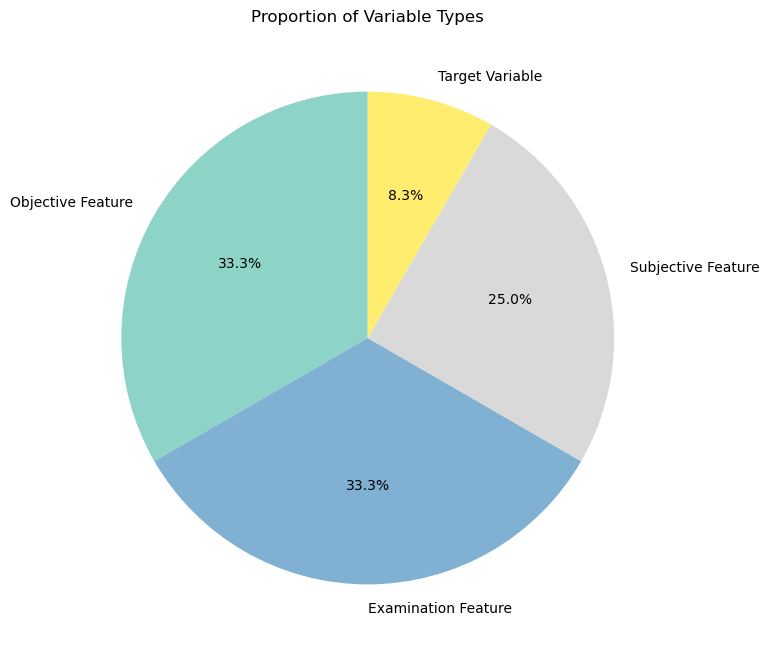

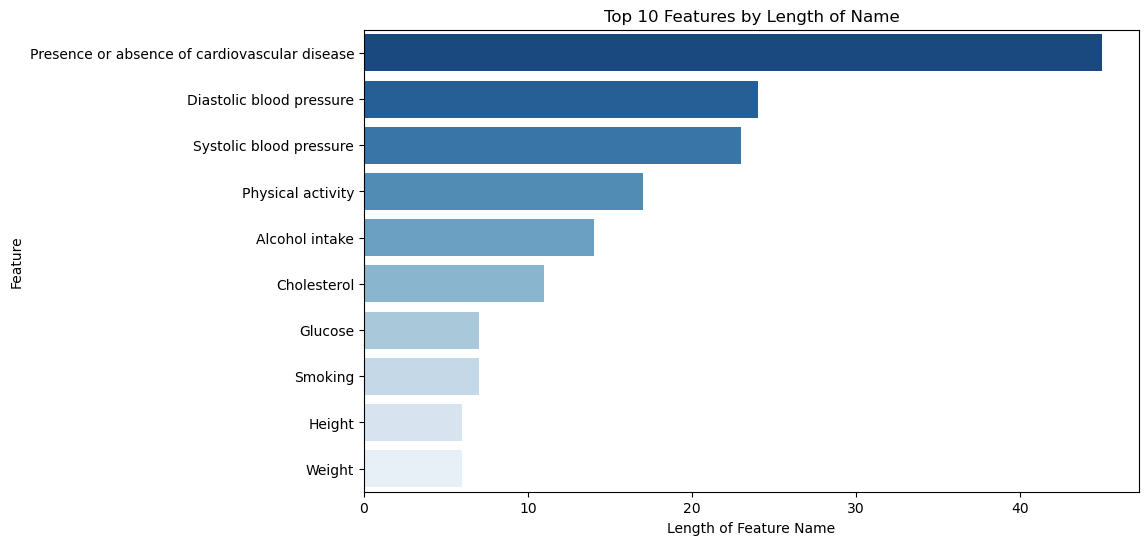

In [49]:
# Step 8: Call the functions to generate plots
generate_barplot()
generate_countplot()
generate_heatmap()
generate_piechart()
generate_horizontal_barplot()